In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

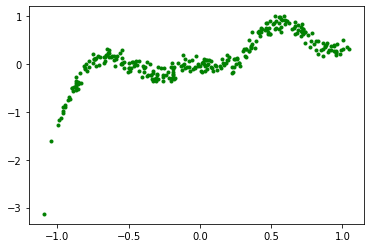

In [4]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [19]:
optim = tnn.SGD()
# optim = tnn.Adam(0.001, 0.5, 0.999)
# optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

gaussian = tnn.Gaussian()

In [20]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
#     err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
#     line0.weights *= 0
#     line1.weights *= 0
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    
    ##########11111111111
    dxl = linear.backward(dy*err_scaler)#*0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
    ##########11111111111
    ##########22222222222
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dxl = linear.backward(dy*err_scaler)
    
#     dxl = linear.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler)#*0.25)
    
#     dx = dxl + dx0  + dx1
    
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.20734077906231368


100 Error =  0.1401155516775838


200 Error =  0.12273217902575465


300 Error =  0.11453308651948779


400 Error =  0.1107503203795426


500 Error =  0.1084375579859191


600 Error =  0.10651126911680654


700 Error =  0.105065760885318


800 Error =  0.10415951691196398


900 Error =  0.10334327961471806


1000 Error =  0.10260000507802756


1100 Error =  0.10175994939320009


1200 Error =  0.10115977934241928


1300 Error =  0.1003610292384104


1400 Error =  0.09988078033451704


1500 Error =  0.09965287149861674


1600 Error =  0.09922148447801689


1700 Error =  0.09882360665629285


1800 Error =  0.09845621187463349


1900 Error =  0.0982090272138577


2000 Error =  0.09788238064966308


2100 Error =  0.09758038863398559


2200 Error =  0.09730076801447787


2300 Error =  0.09704152107527056


2400 Error =  0.09680085868262887


2500 Error =  0.09657716745370355


2600 Error =  0.09636898925250786


2700 Error =  0.09620378565274117


2800 Error 

TclError: invalid command name "pyimage110"

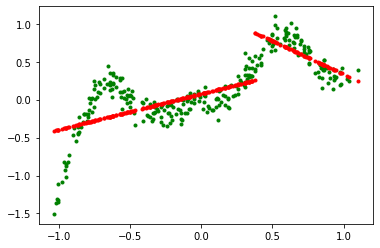

In [7]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [8]:
linear.weights, linear.bias

(array([[6.94870708]]), array([-2.62072666]))

## Sigmoid based,, it has gaussian gradient scaling

In [25]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
linear.weights*=0

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [26]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dys = y0*dy + y1*dy
    
    dyl = sigmoid.backward(dys)
    dxl = linear.backward(dyl)#/0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
#     ##########22222222222
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dxl = linear.backward(sigmoid.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler))
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%10 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, dyl.reshape(-1), color='c', marker='.')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.20734077906231368


10 Error =  0.17086958642058628


20 Error =  0.14038497976039535


30 Error =  0.12201258301821383


40 Error =  0.10756955670240363


50 Error =  0.09997372514919638


60 Error =  0.09605020983614039


70 Error =  0.09439462197427344


80 Error =  0.09382795846699059


90 Error =  0.09368732550290008


100 Error =  0.09366868573643507


110 Error =  0.09367104104958097


120 Error =  0.09367110085995231


130 Error =  0.09366989174525699


140 Error =  0.09366886699644099


150 Error =  0.09366849243165341


160 Error =  0.09366842487342907


170 Error =  0.09366842646318396


180 Error =  0.09366842810750399


190 Error =  0.09366842498421458


200 Error =  0.09366842281404174


210 Error =  0.09366842227369564


220 Error =  0.09366842226120342


230 Error =  0.09366842227218553


240 Error =  0.0912825952050576


250 Error =  0.09105313462219831


260 Error =  0.09086898876684403


270 Error =  0.09035901912292216


280 Error =  0.08999787653198951

TclError: invalid command name "pyimage143"

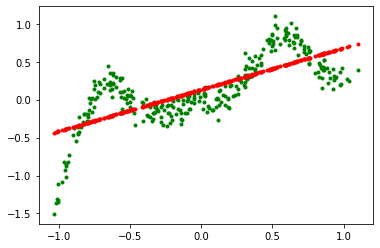

0.09051922613823059


In [91]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)

In [92]:
linear.weights, linear.bias

(array([[-0.05659514]]), array([-1.5804406]))

## Greedy best split

In [ ]:
splits = np.linspace(-1, 1, num=5000)

In [ ]:
def linear_regression(x_, y_):
#     xx_ = np.concatenate([xx, np.ones_like(xx)], axis=1)
#     mc = nalg.pinv(xx_)@yy

    x__ = np.vstack([x_, np.ones_like(x_)]).T
    mc = np.linalg.pinv(x__)@y_
    return mc

In [ ]:
def measure_split(split):
    mask = xx<split
    x1 = xx[mask]
    x2 = xx[~mask]
    y1 = yy[mask]
    y2 = yy[~mask]
    
    if np.count_nonzero(mask) == 0 or np.count_nonzero(~mask) == 0:
        out, error = np.zeros_like(yy), 9e9
        return out, error
    
    out = np.empty_like(yy)
    mc1 = linear_regression(x1, y1)
    mc2 = linear_regression(x2, y2)
    out[mask] = x1*mc1[0]+ mc1[1]
    out[~mask] = x2*mc2[0]+ mc2[1]
    
    error = ((out-yy)**2).mean()
    
    return out, error

In [ ]:
best_out = None
best_split = None
best_error = 9e9
for split in splits:
    out, error = measure_split(split)
    if error<best_error:
        best_error = error
        best_split = split
        best_out = out

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, best_out.reshape(-1), color='r', marker='.')
plt.show()
print(best_error)

In [ ]:
best_error

## Comparision with Double Relu (Continuous)

In [7]:
optim = tnn.Adam(0.01)

net = tnn.AutoForm(new_layers=True)
l1 = tnn.LinearLayer(1,1,optimizer=optim)
l2 = tnn.DoubleReluLinearLayer(1,1, optimizer=optim)

In [8]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout-yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6625040251854916


100 Error =  0.10857774249829025


200 Error =  0.10152079852688377


300 Error =  0.09898024722141834


400 Error =  0.09734243955437914


500 Error =  0.09610150451369781


600 Error =  0.09509091517314758


700 Error =  0.09436253336060979


800 Error =  0.09383553949996906


900 Error =  0.09341557766975792


1000 Error =  0.09310074197417864


1100 Error =  0.09285199104591794


1200 Error =  0.09265743316814619


1300 Error =  0.09251940700809685


1400 Error =  0.09245472275205509


1500 Error =  0.0924238762856595


1600 Error =  0.09240005132504234


1700 Error =  0.09238388801228842


1800 Error =  0.09237343151320297


1900 Error =  0.09236662393235383


2000 Error =  0.09236193418161034


2100 Error =  0.09235920508496896


2200 Error =  0.0923576900090419


2300 Error =  0.09235688778024377


2400 Error =  0.09235648294125906


2500 Error =  0.09235628842530083


2600 Error =  0.09235619955332508


2700 Error =  0.09235616100298402


2800 Er

TclError: invalid command name "."

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)